In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import operator
import warnings; warnings.simplefilter('ignore')
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, pearsonr, mannwhitneyu, spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

### Section 1: Warm Up (1/4)
### 1. Which companies applied for the largest number of H­1B visas where the job opening was located in NYC? Please describe any issues you may encounter summarizing the data by employer name.
 
### 2. Calculate the mean and standard deviation of wages proposed for workers located in New York City and Mountain View. Are the average wages in these two locations statistically different? What factors could explain the results?
 
### 3. For NYC, what is the relationship between the total number of H­1B visas requested by an employer and the average wages proposed? Visually represent this relationship if appropriate. Is the relationship statistically significant? What might explain this relationship?
 
### Section 2: Brainstorming (1/4)
### What interesting questions might this dataset address? Brainstorm a handful of interesting questions, and scope them. Describe steps, methodology, and level of effort that would be required to answer each question. Additional, enriching, datasets are allowed, but not required.
 
### Section 3: Exploration (1/2)
### Choose a question to answer from your brainstorming section. We encourage you to use this section to demonstrate some of your strengths and abilities in data science (given the short timeframe for the test.

In [2]:
#reading the csv

df = pd.read_csv("H1B2.csv")

In [3]:
#looking at the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517435 entries, 0 to 517434
Data columns (total 35 columns):
lca_case_number                   517435 non-null object
status                            517435 non-null object
lca_case_submit                   517435 non-null object
decision_date                     517435 non-null object
visa_class                        517435 non-null object
lca_case_employment_start_date    517431 non-null object
lca_case_employment_end_date      517430 non-null object
lca_case_employer_name            517407 non-null object
lca_case_employer_address         517393 non-null object
lca_case_employer_city            517408 non-null object
lca_case_employer_state           517389 non-null object
lca_case_employer_postal_code     517394 non-null object
lca_case_soc_code                 517386 non-null object
lca_case_soc_name                 513178 non-null object
lca_case_job_title                517428 non-null object
lca_case_wage_rate_from           

In [4]:
#viewing column names to clean the data

df.columns.values

array(['lca_case_number', 'status', 'lca_case_submit', 'decision_date',
       'visa_class', 'lca_case_employment_start_date',
       'lca_case_employment_end_date', 'lca_case_employer_name',
       'lca_case_employer_address', 'lca_case_employer_city',
       'lca_case_employer_state', 'lca_case_employer_postal_code',
       'lca_case_soc_code', 'lca_case_soc_name', 'lca_case_job_title',
       'lca_case_wage_rate_from', 'lca_case_wage_rate_to',
       'lca_case_wage_rate_unit', 'full_time_pos', 'total_workers',
       'lca_case_workloc1_city', 'lca_case_workloc1_state', 'pw_1',
       'pw_unit_1', 'pw_source_1', 'other_wage_source_1',
       'yr_source_pub_1', 'lca_case_workloc2_city',
       'lca_case_workloc2_state', 'pw_2', 'pw_unit_2', 'pw_source_2',
       'other_wage_source_2', 'yr_source_pub_2', 'lca_case_naics_code'],
      dtype=object)

In [4]:
#choosing columns with rich and relevant data

df = df[['status', 'lca_case_submit', 'decision_date',
       'visa_class', 'lca_case_employment_start_date',
       'lca_case_employment_end_date', 'lca_case_employer_name',
       'lca_case_employer_address','lca_case_employer_city',
       'lca_case_employer_state', 'lca_case_employer_postal_code',
       'lca_case_soc_code', 'lca_case_soc_name', 'lca_case_job_title', 
       'lca_case_wage_rate_from', 'lca_case_wage_rate_unit', 'full_time_pos', 'total_workers']]

In [5]:
#renaming columns

df.columns = ['status', 'submit_date', 'decision_date',
       'visa_class', 'start_date','end_date', 'employer_name', 'employer_address',
       'employer_city','employer_state', 'employer_postal_code',
       'soc_code', 'soc_name', 'job_title', 'wage_rate_from', 'wage_unit',
       'full_time', 'total_workers']

In [6]:
#dropping NAs

df = df.dropna()

In [7]:
#we have a clean & workable dataset!

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513071 entries, 0 to 517434
Data columns (total 18 columns):
status                  513071 non-null object
submit_date             513071 non-null object
decision_date           513071 non-null object
visa_class              513071 non-null object
start_date              513071 non-null object
end_date                513071 non-null object
employer_name           513071 non-null object
employer_address        513071 non-null object
employer_city           513071 non-null object
employer_state          513071 non-null object
employer_postal_code    513071 non-null object
soc_code                513071 non-null object
soc_name                513071 non-null object
job_title               513071 non-null object
wage_rate_from          513071 non-null float64
wage_unit               513071 non-null object
full_time               513071 non-null object
total_workers           513071 non-null float64
dtypes: float64(2), object(16)
memory usa

### 1. Which companies applied for the largest number of H­1B visas where the job opening was located in NYC? Please describe any issues you may encounter summarizing the data by employer name.

#### Difficulties summarizing the data by employer name include: spelling/formatting errors, duplicate companies (e.g Citibank/Citigroup), and finding companies by the numerous cities located within New York City. 

In [8]:
#bringing in open source geodataframes with all nyc neighbourhoods and boroughs

nyc_hood = gpd.GeoDataFrame.from_file("Via-Data/geojsonData/NYCneighbourhood.geojson")
nyc_boro = gpd.GeoDataFrame.from_file("Via-Data/geojsonData/BoroughBoundaries.geojson")

#converting borough and neighborhood to upper case

nyc_hood['neighborhood'] = nyc_hood['neighborhood'].str.upper()
nyc_boro['boro_name'] = nyc_boro['boro_name'].str.upper()

#eliminating all but neighborhood and borough columns

nyc_hood = nyc_hood[['neighborhood']]
nyc_boro = nyc_boro[['boro_name']]

#changing title of borough column to concatenate with neighborhood dataframe

nyc_boro.columns = ['neighborhood']

In [9]:
#examining cities in New York state to find NYC designations besides 
#"NEW YORK" in "employer_city" and to catch mis/alternate spellings of New York City
#and New York City neighbourhoods

ny = df[df['employer_state'] == 'NY']
ny_list = ny['employer_city'].unique()
ny_list = np.sort(ny_list)

In [10]:
#in some instances, the city is listed as a suite, level or floor
#examining them to make sure they're in NYC and making a list of these to add to nyc df

ny_not_city = ny[ny['employer_city'].isin(x for x in ny['employer_city'] if 'FLOOR' in x 
                                  or 'SUITE' in x or 'LEVEL' in x)]
ny_not_city = ny_not_city['employer_city'].tolist()

In [11]:
# putting additional New York neighbourhood misspellings into a list
# then turning that list into dataframe
# naming column in dataframe

extra_nyc = ["NEW YORK", "BRONX, NEW YORK",'NEW YORK, NEW YORK', 'NEW YORK, NY', 'CITY OF NEW YORK', 
             'NEW YORK,NY', 'NEW YORK,NEW YORK', 'NEW YORK,', 'NEW YOK', 'NEWYORK', 'NEW YORK CIY', 
             'NY', 'NYC', 'NEW YORK, NEW YORK 10003', 'NEW YORKI', 'NEW YROK', 'BROOKLYM', 
             'FLUSHING, NY', 'FUSHING', 'JAMACIA', 'L.I.C.', 'LIC', 'LONG ISLAND CITY,', 
             'LONGISLAND CITY', '601 W. 26TH ST.', '39TH FLOOR', 'SUITE 223', '12TH FLOOR',
             '601 W. 26TH ST., SUITE 325-57', 'SUITE 1100','29TH FLOOR','31ST FLOOR', 'LEVEL 9']

extra_nyc = pd.DataFrame(np.array(extra_nyc))
extra_nyc.columns = ['neighborhood']

In [12]:
ny.head()

,status,submit_date,decision_date,visa_class,start_date,end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_unit,full_time,total_workers
36,CERTIFIED-WITHDRAWN,2013-09-11,2014-04-10,H-1B,2014-02-28,2015-03-31,FITCH RATINGS,ONE STATE STREET PLAZA,NEW YORK,NY,10004,13-2051,Financial Analysts,DIRECTOR,157300.0,Year,Y,1.0
43,CERTIFIED-WITHDRAWN,2012-05-02,2014-08-21,H-1B,2012-05-11,2015-05-10,BARCLAYS CAPITAL INC.,745 SEVENTH AVENUE,NEW YORK,NY,10019,15-1132,"Software Developers, Applications","VICE PRESIDENT, QUANTITATIVE EQUITIES APPLICAT...",175000.0,Year,Y,1.0
62,CERTIFIED,2013-10-24,2013-11-01,H-1B,2013-10-24,2016-10-22,"BLACKROCK INVESTMENT MANAGEMENT, LLC",40 EAST 52ND STREET,NEW YORK,NY,10022,13-1111,Management Analysts,ASSOCIATE,82659.0,Year,Y,1.0
74,CERTIFIED,2014-05-15,2014-05-21,H-1B,2014-11-14,2017-07-26,"MIRIMUS, INC.",1 BUNGTOWN ROAD,COLD SPRING HARBOR,NY,11724,19-4021,Biological Technicians,PROJECT MANAGER (GENETICALLY ENGINEERED MOUSE ...,57540.0,Year,Y,1.0
87,CERTIFIED-WITHDRAWN,2011-04-07,2013-10-18,H-1B,2011-09-09,2014-09-08,PFIZER INC,235 EAST 42ND STREET,NEW YORK,NY,10017,19-2031.00,Chemists,SENIOR ASSOCIATE SCIENTIST,62500.0,Year,Y,1.0


In [13]:
#concatenating all NYC neighborhoods, boroughs and misspellings into one dataframe
#renaming "employer_city" for join
#dropping duplicates

nycdfs = [nyc_hood, nyc_boro, extra_nyc]
nyc_hood = pd.concat(nycdfs) 
nyc_hood.columns = ['employer_city']
nyc_hood = nyc_hood.drop_duplicates(keep='first')

In [14]:
#inner joining new york state dataframe with the nyc neighborhood dataframe
#this will only keep the New York state rows within New York City

nyc = ny.merge(nyc_hood, how='inner', on='employer_city')

In [15]:
#see "BROOKLYM"

nyc.tail()

,status,submit_date,decision_date,visa_class,start_date,end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_unit,full_time,total_workers
30623,DENIED,2014-03-04,2014-03-10,E-3 Australian,2014-06-01,2016-06-01,ASHURST LLP,7 TIMES SQUARE,NEW YORK CIY,NY,10036,23-1011,Lawyers,ASSOCIATE,210000.00,Year,Y,1.0
30624,DENIED,2014-03-13,2014-03-20,E-3 Australian,2014-06-01,2016-06-01,ASHURST LLP,7 TIMES SQUARE,NEW YORK CIY,NY,10036,23-1011,Lawyers,ASSOCIATE,210000.00,Year,Y,1.0
30625,DENIED,2014-08-08,2014-08-15,E-3 Australian,2014-09-02,2016-09-01,"BACK ROOM STUDIO, LLC.","144 HALSEY AVENUE, #1",BROOKLYM,NY,11216,27-2012,Producers and Directors,CREATIVE PRODUCER,24.38,Hour,N,1.0
30626,CERTIFIED,2014-08-13,2014-08-19,E-3 Australian,2014-09-02,2016-09-01,"BACK ROOM STUDIO, LLC.","144 HALSEY AVENUE, #1",BROOKLYM,NY,11216,27-2012,Producers and Directors,CREATIVE PRODUCER,24.38,Hour,N,1.0
30627,CERTIFIED,2014-08-19,2014-08-25,E-3 Australian,2014-09-08,2016-09-07,"BACK ROOM STUDIO, LLC.","144 HALSEY AVENUE, #1",BROOKLYM,NY,11216,27-2012,Producers and Directors,CREATIVE PRODUCER,24.38,Hour,N,1.0


In [16]:
#simple analysis involving top 20 listings from most to least H1B visa inquiries in NYC

nye = pd.DataFrame(nyc['employer_name'].value_counts())
nye.head(20)

,employer_name
MPHASIS CORPORATION,945
"GOLDMAN, SACHS & CO.",605
MORGAN STANLEY & CO. LLC,469
"CITIBANK, N.A.",412
"BLOOMBERG, LP",369
CREDIT SUISSE SECURITIES (USA) LLC,365
COLUMBIA UNIVERSITY,311
CITIGROUP GLOBAL MARKETS INC.,282
"GRANDISON MANAGEMENT, INC.",234
DEUTSCHE BANK SECURITIES INC.,230


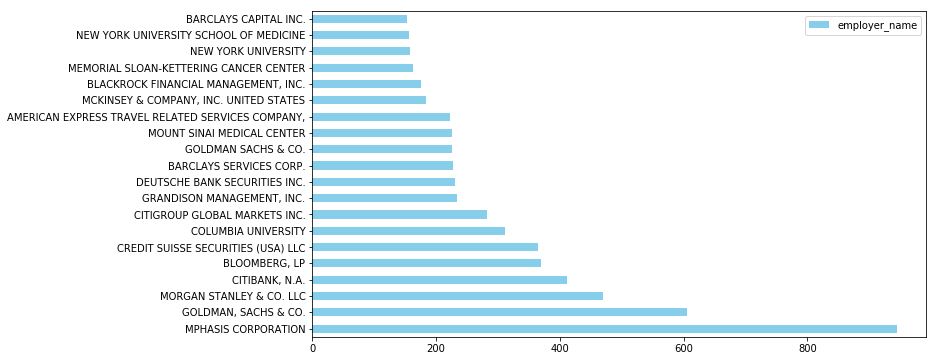

In [19]:
nye.head(20).plot(kind='barh', color='skyblue', figsize = (11,6));

In [20]:
#resetting index for more in-depth/precise analysis

nye = nye.reset_index()

In [21]:
#made a list of company name attributes
#summed H1B inquiries by attribute and put attribute and application sum in a dictionary
#determined name attribute sorted by sum of H1B applications

list1 = str(nye['index']).split()
list2 = []

for i in list1:
    g = nye[nye['index'].isin(x for x in nye['index'] if i in x)]
    list2.append(g['employer_name'].sum())
    h = dict(zip(list1, list2))
    sorted_h = sorted(h.items(), key=operator.itemgetter(1))
sorted_h

[('dtype:', 0),
 ('26', 0),
 ('8220', 0),
 ('...', 0),
 ('8222', 0),
 ('8212', 0),
 ('8224', 0),
 ('8225', 0),
 ('8226', 0),
 ('8227', 0),
 ('8228', 0),
 ('8229', 0),
 ('8214', 0),
 ('8216', 0),
 ('DANC...', 0),
 ('8233', 0),
 ('8232', 0),
 ('8231', 0),
 ('8230', 0),
 ('8236', 0),
 ('8235', 0),
 ('8234', 0),
 ('8208', 0),
 ('8207', 0),
 ('27', 0),
 ('8211', 0),
 ('8219', 0),
 ('8218', 0),
 ('8210', 0),
 ('8213', 0),
 ('8215', 0),
 ('8217', 0),
 ('index,', 0),
 ('8221', 0),
 ('8223', 0),
 ('Name:', 0),
 ('Length:', 0),
 ('8209', 0),
 ('object', 0),
 ('8237,', 0),
 ('GERNER,', 1L),
 ('HAILEY', 1L),
 ('TUMOR', 1L),
 ('ASSCOIATES', 1L),
 ('23', 1L),
 ('WARRANTS', 1L),
 ('ROSSPORT', 1L),
 ('EPIQ', 1L),
 ('YUJI', 1L),
 ('ALTOUR', 1L),
 ('TAMARA', 1L),
 ('EJEWELER.COM', 1L),
 ('EMBY', 1L),
 ('CELINE', 1L),
 ('YOSHIMOTO', 1L),
 ('STUDIOTEKA', 1L),
 ('EDISCOVERY', 1L),
 ('DUNCAN', 1L),
 ('ISADORA', 1L),
 ('VALCARCEL,', 1L),
 ('KRONICK', 1L),
 ('MOSS', 1L),
 ('EXIGIS,', 1L),
 ('NYX', 2L),
 ('25'

In [24]:
#Making a function that returns the sum of H1B requests per string

def name_count(x):
    g = nye[nye['index'].str.contains(x)==True]
    return g['employer_name'].sum()

In [25]:
#the main top contender(s) that can get lost in the above analysis include New York University

name_count("NEW YORK UNIVERSITY|NYU|NEWYORKUNIVERSITY")

381L

In [26]:
#Citi_____

name_count("CITIBANK|CITIGROUP|CITICORP|CITIMORTGAGE|CITIFINANCIAL|CITI INTERNATIONAL")

1058L

In [27]:
#Jp Morgan Stanley

name_count("MORGAN STANLEY")

593L

In [28]:
#and American Expres

name_count("AMERICAN EXPRESS|AMERICANEXPRESS")

429L

In [29]:
#goldman sachs requires clarification due to duplicate non Goldman Sachs companies with
#goldman in their name

name_count('GOLDMAN, SACHS|GOLDMAN SACHS|GOLDMAN,SACHS')

931L

In [30]:
#Mt Sinai Beth Israel

name_count('SINAI|BETH ISRAEL')

243L

#### The top 20 companies applying for H1B visas by # of applications in order from most to least are: 
- Citigroup
- Mphasis
- Goldman Sachs
- Barclays
- Morgan Stanley
- American Express
- Deutsche Bank
- NYU
- Credit Suisse
- Bloomberg
- Columbia University
- Blackrock
- Mount Sianai/Beth Israel Medical Center
- Grandison
- McKinsey
- Sloan Kettering Medical Center
- EXLSERVICE.COM
- Weill-Cornell
- Montefiore Hosptila
- St Barnabas Hospital
 
 output from dictionary in reverse:
 ('BARNABAS', 123),
 ('MONTEFIORE', 125),
 ('WEILL', 138),('CORNELL', 138),
 ('EXLSERVICE.COM,', 139),
 ('SLOAN-KETTERING', 162),
 ('MCKINSEY', 186),
 ('GRANDISON', 235),
 Mount Sinai/Beth Israel = 243,
 ('BLACKROCK', 297),
 COLUMBIA UNIVERSITY = 323,
 ('BLOOMBERG,', 369),
 ('SUISSE', 380)= Credit Suisse,
 NYU = 381,
 DEUTSCHE BANK 387,
 American Express = 429,
 ('MORGAN', 596) & ('STANLEY', 594) = 593,
 ('BARCLAYS', 630),
 ('SACHS', 931) = Goldman Sachs,
 ('MPHASIS', 948),
 CITIGROUP = 1058

In [32]:
df.head()

,status,submit_date,decision_date,visa_class,start_date,end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_unit,full_time,total_workers
0,CERTIFIED-WITHDRAWN,2013-01-18,2014-09-29,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,TX,78666,19-1029,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0,Year,Y,1.0
1,CERTIFIED,2014-03-17,2014-03-21,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,IN,46202,29-1041,Optometrists,OPTOMETRIST,65000.0,Year,Y,1.0
2,DENIED,2014-03-14,2014-03-20,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,MN,55802,27-2011,Actors,FOOD SAFETY SCIENTIST,50000.0,Year,Y,1.0
3,CERTIFIED,2014-03-01,2014-03-06,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,GA,30045,13-2011,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0,Year,Y,1.0
4,CERTIFIED-WITHDRAWN,2014-03-10,2014-03-17,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,VA,20147,15-1131,Computer Programmers,PROGRAMMER ANALYST,62000.0,Year,Y,1.0


In [34]:
#this is weird - PWC has H1B employees only in Florida and Illinois

pwc = df[df['employer_name'].str.contains('PRICEWATERHOUSECOOPERS|PWC')==True]
print pwc['employer_state'].unique()
print len(pwc)

['FL' 'IL']
946


In [35]:
#there are literally zero deloitte H1B employees in NY?

delo = df[df['employer_name'].str.contains('DELOITTE')==True]
print delo['employer_state'].unique()
print len(delo)
print len(delo[delo['employer_name'] == 'NY'])

['PA' 'GU' 'NY' 'CT']
9366
0


## Doing outside research on NYC H1B applications, it's clear that this dataset is incomplete. Deloitte and PWC have the most H1B applications in NYC.

In [37]:
#finding total visa apps by # of workers with a pivot table
#here's the top 20

workers = pd.DataFrame(pd.pivot_table(nyc, index='employer_name', values='total_workers', aggfunc='sum'))
workers = workers.reset_index()
workers.columns = 'index', 'total_workers'
workers = workers.sort_values('total_workers', ascending=False)
workers.head(20)

,index,total_workers
4930,MPHASIS CORPORATION,20280.0
5119,NEW YORK CITY DEPARTMENT OF EDUCATION,2871.0
2942,"GRANDISON MANAGEMENT, INC.",2320.0
4608,"MCKINSEY & COMPANY, INC. UNITED STATES",1212.0
2898,"GOLDMAN, SACHS & CO.",983.0
917,BILINGUALS INC.,644.0
966,"BLOOMBERG, LP",643.0
4878,MORGAN STANLEY & CO. LLC,469.0
2372,"EXLSERVICE.COM, LLC",440.0
5989,"RBC CAPITAL MARKETS, LLC",438.0


In [38]:
#same algorithm as above that counts words by # of workers

list1 = str(workers['index']).split()
list2 = []

for i in list1:
    g = workers[workers['index'].isin(x for x in workers['index'] if i in x)]
    list2.append(g['total_workers'].sum())
    h = dict(zip(list1, list2))
    sorted_h = sorted(h.items(), key=operator.itemgetter(1))
sorted_h

[('5170', 0),
 ('7955', 0),
 ('3447', 0),
 ('dtype:', 0),
 ('5989', 0),
 ('4676', 0),
 ('1461', 0),
 ('...', 0),
 ('P...', 0),
 ('3401', 0),
 ('3403', 0),
 ('1950', 0),
 ('5992', 0),
 ('4878', 0),
 ('7212', 0),
 ('8236', 0),
 ('3450', 0),
 ('3443', 0),
 ('3474', 0),
 ('3385', 0),
 ('3473', 0),
 ('3478', 0),
 ('3388', 0),
 ('917', 0),
 ('3467', 0),
 ('3390', 0),
 ('3465', 0),
 ('1728', 0),
 ('3460', 0),
 ('3399', 0),
 ('3455', 0),
 ('3469', 0),
 ('3468', 0),
 ('3458', 0),
 ('2372', 0),
 ('index,', 0),
 ('3452', 0),
 ('3453', 0),
 ('3456', 0),
 ('3457', 0),
 ('3454', 0),
 ('1586', 0),
 ('3466', 0),
 ('4608', 0),
 ('3463', 0),
 ('4930', 0),
 ('966', 0),
 ('2898', 0),
 ('3445', 0),
 ('3441', 0),
 ('2892', 0),
 ('1103', 0),
 ('5119', 0),
 ('2942', 0),
 ('3439', 0),
 ('4921', 0),
 ('Name:', 0),
 ('Length:', 0),
 ('5168', 0),
 ('object', 0),
 ('4857', 0),
 ('949', 0),
 ('947', 0),
 ('1471', 0),
 ('8237,', 0),
 ('806', 0),
 ('406', 1.0),
 ('INDONESIAN', 1.0),
 ('INSIGHTLAB', 1.0),
 ('INSPARISK

In [39]:
def name_count2(x):
    g = workers[workers['index'].str.contains(x)==True]
    return g['total_workers'].sum()

In [40]:
#looking for names that got lost in the word count analysis
#NYU

name_count2("NEW YORK UNIVERSITY|NYU|NEWYORKUNIVERSITY")

381.0

In [41]:
#NYC Department of education

name_count2("NEW YORK CITY DEPARTMENT OF EDUCATION")

2871.0

In [43]:
#CITI___

name_count2('CITIBANK|CITIGROUP|CITICORP|CITIMORTGAGE|CITIFINANCIAL|CITI INTERNATIONAL')

1058.0

In [45]:
#American Express

name_count2('AMERICAN EXPRESS|AMERICANEXPRESS')

433.0

In [46]:
#Credit Suisse

name_count2('SUISSE')

380.0

In [47]:
#Bronx-Lebanon

name_count2("BRONX-LEBANON|BRONX LEBANON")

240.0

In [48]:
#Goldman Sachs

name_count2('GOLDMAN, SACHS|GOLDMAN SACHS|GOLDMAN,SACHS')

1387.0

In [49]:
#Beth Israel Mount Siani

name_count2('SINAI|BETH ISRAEL')

247.0

#### By total number of workers, The NYC Department of Education is the standout of this analysis. The top 20 companies applying for H1B visas, bu total number of workers, from most to least are: 
- Mphasis
- NYC Department of Education
- Grandison
- Goldman Sachs
- McKinsey
- Citibank/Group
- Bloomberg
- Barclays
- Morgan Stanley
- Blackrock
- EXLSERVICE
- RBC
- American Express
- Deutsche Bank
- NYU
- Credit Suisse
- Columbia University
- Mount Siani Beth Israel Medical Center 
- Bronx-Lebanon Medical Center
- Sloan-Kettering
 
 output from dicttionary in reverse:
 ('SLOAN-KETTERING', 162.0),
 Bronx Lebanon = 240
 Beth Israel Mt Sianai = 247
 COLUMBIA UNIVERSITY', 323.0,
 ('SUISSE', 380.0),
 NYU = 381,
 DEUTSCHE BANK', 387.0,
 American Express = 433
 ('RBC', 438.0),
 ('EXLSERVICE.COM,', 446.0),
 ('BLACKROCK', 449.0),
 ('STANLEY', 594.0) and ('MORGAN', 596.0) = 593,
 ('BARCLAYS', 630.0),
 ('BLOOMBERG,', 643.0),
 CITIGROUP = 1058,
 ('MCKINSEY', 1215.0),
 Goldman Sachs = 1387,
 ('GRANDISON', 2330.0),
 New York City Department of Education = 2871,
 ('MPHASIS', 20355.0)

### 2. Calculate the mean and standard deviation of wages proposed for workers located in New York City and Mountain View. Are the average wages in these two locations statistically different? What factors could explain the results?

In [17]:
#function that calculates yearly salary

def salary_calc(x, y):
    if 'Year' in x:
        return y
    if 'Month' in x:
        return y*12
    if 'Week' in x:
        return y*52
    if 'Bi-Weekly' in x:
        return y*26
    if 'Hour' in x:
        return y*2080
    else:
        pass

In [18]:
#I'm examining only full-time workers as we can't successfully compare ft/pt salaries

nyft = nyc[nyc['full_time'] == 'Y']

In [19]:
#understanding NY full time employee salary

nyft['salary'] = nyft[['wage_unit','wage_rate_from']].apply(lambda x: salary_calc(*x), axis=1)

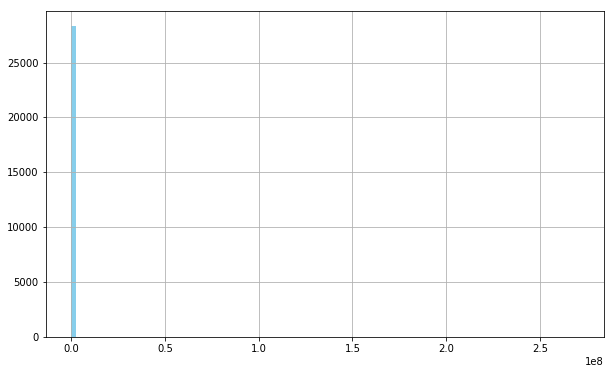

In [20]:
#NY Wage Distribution is pretty skewed...

nyft['salary'].hist(bins=100, figsize = (10,6), color = 'skyblue');

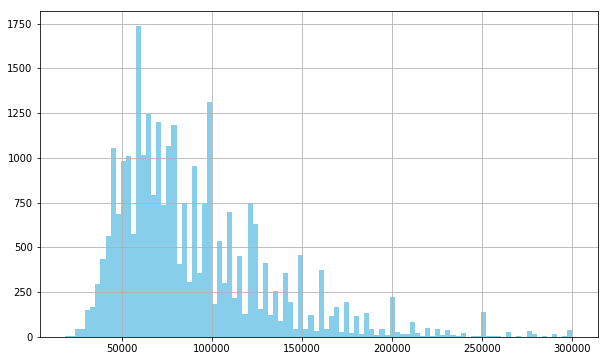

In [21]:
#zooming in on the bulk of the data, it's skewed

ny2 = nyft[nyft['salary'].between(0, 300000, inclusive=True)]

ny2['salary'].hist(bins=100, figsize = (10,6), color = 'skyblue');

In [22]:
#examining higher salaries - when not labeled as "Year" they appear to have a very high
#rate of error

greater_than = nyft[nyft['salary']>250000]
greater_than[greater_than['wage_unit'] != 'Year']

,status,submit_date,decision_date,visa_class,start_date,end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_unit,full_time,total_workers,salary
428,CERTIFIED-WITHDRAWN,2011-10-11,2014-05-02,H-1B,2011-11-14,2014-11-13,"ASI SYSTEM INTEGRATION, INC.",48 W. 37TH ST.,NEW YORK,NY,10018,15-1142,Network and Computer Systems Administrators,NETWORK SYSTEMS ANALYST,80000.00,Hour,Y,1.0,166400000.0
950,CERTIFIED-WITHDRAWN,2012-10-17,2013-12-05,H-1B,2012-10-29,2015-10-29,SATORI CONSULTING,48 WALL STREET,NEW YORK,NY,10005,13-1111,Management Analysts,MANAGEMENT CONSULTANT,65000.00,Hour,Y,1.0,135200000.0
2264,WITHDRAWN,2013-10-21,2013-10-24,H-1B,2013-12-13,2016-12-12,FRESHPLANET INC,311 WEST 43RD STREET SUITE 1404,NEW YORK,NY,10036,27-1024,Graphic Designers,GAME GRAPHIC DESIGNER,70000.00,Hour,Y,1.0,145600000.0
2434,WITHDRAWN,2013-10-23,2013-10-31,H-1B,2013-12-01,2016-11-30,"MARSH &AMP; FRIED HOLDINGS, L.P.",11 BROADWAY SUITE 521,NEW YORK,NY,10004-1359,23-1011,Lawyers,GENERAL COUNSEL,130000.00,Hour,Y,1.0,270400000.0
2503,WITHDRAWN,2013-10-25,2013-10-31,H-1B,2013-11-18,2016-11-18,"AMERICAN EXPRESS TRS CO., INC.",200 VESEY STREET,NEW YORK,NY,10285,15-2031,Operations Research Analysts,DATA SCIENTIST,115000.00,Hour,Y,1.0,239200000.0
3495,WITHDRAWN,2013-11-19,2013-11-20,H-1B,2013-12-02,2016-12-01,BARCLAYS BANK DELAWARE,200 PARK AVENUE,NEW YORK,NY,10166,13-1111,Management Analysts,RISK ANALYSIS LEAD,85000.00,Hour,Y,1.0,176800000.0
3870,CERTIFIED,2013-12-02,2013-12-06,H-1B,2014-01-16,2014-09-22,NEW YORK UNIVERSITY,OFFICE OF GLOBAL SERVICES,NEW YORK,NY,10012,25-1062,"Area, Ethnic, and Cultural Studies Teachers, P...",ADJUNCT INSTRUCTOR,120.50,Hour,Y,1.0,250640.0
3884,WITHDRAWN,2013-12-02,2013-12-03,H-1B,2014-06-01,2017-05-31,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,550 FIRST AVENUE,NEW YORK,NY,10016,19-1029,"Biological Scientists, All Other",POSTDOCTORAL FELLOW,55000.00,Hour,Y,1.0,114400000.0
4098,WITHDRAWN,2013-12-09,2013-12-11,H-1B,2014-05-01,2017-04-30,THE ROCKEFELLER UNIVERSITY,1230 YORK AVENUE,NEW YORK,NY,10065,19-1029,"Biological Scientists, All Other",RESEARCH ASSOCIATE,60000.00,Hour,Y,1.0,124800000.0
4357,CERTIFIED,2013-12-18,2013-12-24,H-1B,2014-03-01,2017-03-01,"NEW YORK UNIVERSITY, COURANT INSTITUTE OF MATH...",251 MERCER STREET,NEW YORK,NY,10012-1185,25-1022,"Mathematical Science Teachers, Postsecondary",GLOBAL DISTINGUISHED PROFESSOR OF MATHEMETICS,5714.00,Week,Y,1.0,297128.0


In [23]:
#there are a lot of errors for non-yearly wage information
#we're going to proceed with only full time yearly workers

nyc4 = nyc[(nyc['full_time'] == 'Y') & (nyc['wage_unit'] == 'Year')]

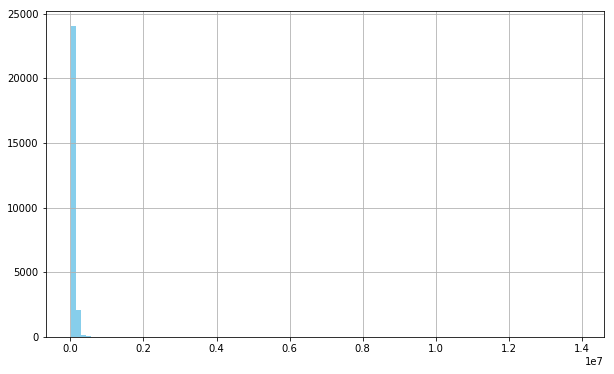

In [26]:
nyc4['wage_rate_from'].hist(bins=100, figsize = (10,6), color = 'skyblue');

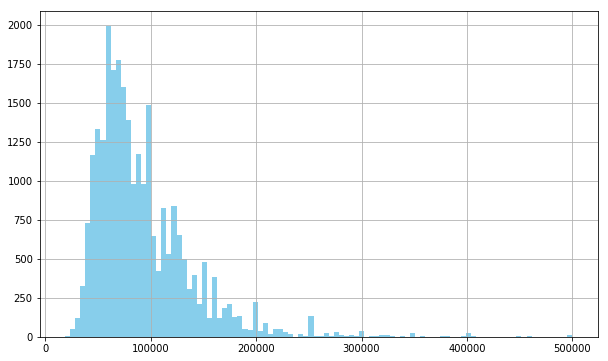

In [27]:
#zooming in to understand data - it's right skewed

fty2 = nyc4[nyc4['wage_rate_from'].between(0, 500000, inclusive=True)]

fty2['wage_rate_from'].hist(bins=100, figsize = (10,6), color = 'skyblue');

In [28]:
#finding alternative names for mountain view to make mountain view df

ca = df[df['employer_state'] == 'CA']
ca_list = ca['employer_city'].unique()
ca_list = np.sort(ca_list)

In [29]:
#mountain view DF including full time employees with yearly salary

mv = ca[ca['employer_city'].isin(x for x in ca['employer_city'] if 'MOUNTAIN VIEW' in x or 'MOUNTIAN VIEW' in x or
       'MOUTAIN VIEW' in x)]
mv = mv[(mv['full_time'] == 'Y') & (mv['wage_unit'] == 'Year')]

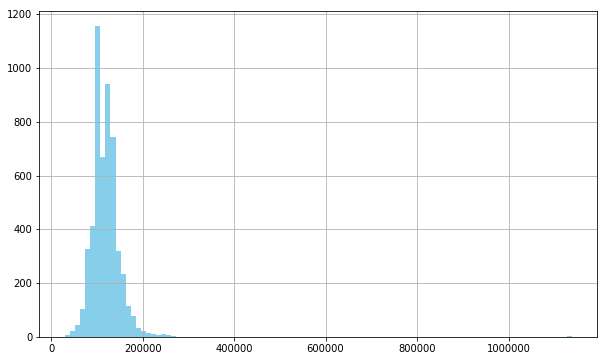

In [38]:
#Mountain View Wage Rate Distribution, more normal than NYC
#skewed but much less so

mv['wage_rate_from'].hist(bins=100, figsize = (10,6), color = 'skyblue');

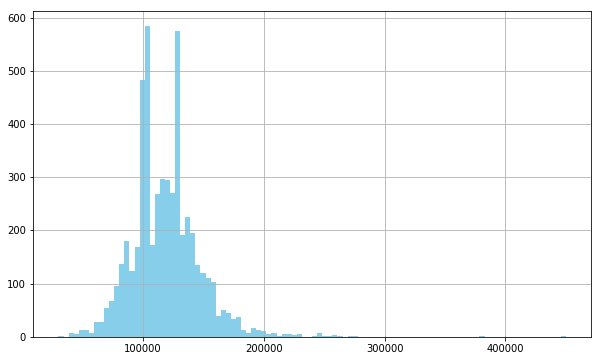

In [39]:
#zooming in for better view
#it's right skewed but pretty closer to a normal distribution

mv2 = mv[mv['wage_rate_from'].between(0, 500000, inclusive=True)]

mv2['wage_rate_from'].hist(bins=100, figsize = (10,6), color = 'skyblue');

In [40]:
#adding column to designate city and concatenating into large data frame

nyc4['city'] = 'NEW YORK'
mv['city'] = 'MOUNTAIN VIEW'
dfs = [nyc4, mv]
nymv = pd.concat(dfs)

In [41]:
#creating pivot table 

dfs = [nyc4, mv]
nymv = pd.concat(dfs)
tbl = pd.pivot_table(nymv, columns = 'city', values = 'wage_rate_from', aggfunc = ('mean', 'median', 'std', 'count')).round(2)
tbl['difference'] = tbl['NEW YORK'] - tbl['MOUNTAIN VIEW']
tbl

city,MOUNTAIN VIEW,NEW YORK,difference
count,5272.00,26294.00,21022.00
mean,118905.32,94833.60,-24071.72
median,115253.00,80000.00,-35253.00
std,34430.75,126548.94,92118.19


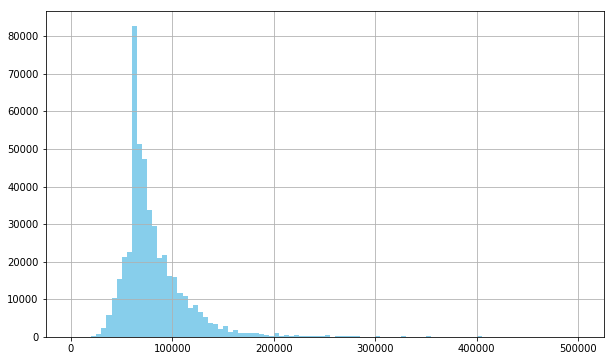

In [42]:
#looking at overall distribution of yearly salaried full time workers up to $500K/year
#it's right-skewed like the other distributions, so this chart is zoomed in

sub = df[(df['full_time'] == 'Y') & (df['wage_unit'] == 'Year')]
sub1 = sub[sub['wage_rate_from'].between(0, 500000, inclusive=True)]
sub1['wage_rate_from'].hist(bins=100, figsize=(10,6), color='skyblue');

#### the tests of statistical significance show that these are two indepenent populations

In [43]:
#Welch's t test = a t-test that's not assuming equal variance
#this test isn't perfect considering the skew but welch's t-test can be robust to skew
#with higher populations of data like here

ttest_ind_from_stats(118400.14, 28225.07, 5313.0, 94632.14, 47115.97, 23601.0, equal_var=False)

Ttest_indResult(statistic=48.11645700016097, pvalue=0.0)

In [44]:
#mann-whitney U test is probably a better test for these distributions

mannwhitneyu(nyc4['wage_rate_from'], mv['wage_rate_from'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=34871846.0, pvalue=0.0)

The average H1B employee in Mountain View makes ~24K per year more than the average NYC employee, but the standard deviation for Mountain View is only ~29% of the mean, whereas the standard deviation for NYC is ~133% of the mean. Salaries in Mountain View are a more homogenized. 

There is a statistically significant difference in average wages between NYC and Mountain View. We determine this by doing Welch's T-test and Mann-Whitney U-test. For both tests, the p-value is very low.

What can explain the difference? First of all, the Mountain View sample is ~20% of the size of the NYC sample. A lower sample size can contribute to the lower standard deviation in Mountain View simply because there are fewer opportunities for variance. Also, Mountain View's primary industry is technology, which has relatively high salaries across the board. NYC is a bigger city with more diverse types of employment including finance and education. If you consider, as per the first question, that the primary employers in the most populated city in the country are financial firms and educational institutions, you can understand that there's going to be more variance in salary than in a smaller city with one main industry. The salaries in NYC Education and Finance are going to have much of a larger spread than in just tech.

### 3. For NYC, what is the relationship between the total number of H­1B visas requested by an employer and the average wages proposed? Visually represent this relationship if appropriate. Is the relationship statistically significant? What might explain this relationship?

In [45]:
ny3 = pd.pivot_table(nyc4, index = 'employer_name', values = 'wage_rate_from', aggfunc= ('mean', 'count')).round(2)
ny3 = ny3.reset_index()
ny3.head()

,employer_name,count,mean
0,"""I HAVE A DREAM"" FOUNDATION",1,107245.00
1,"1-0 CAPITAL, LLC",2,100000.00
2,1010DATA SERVICES LLC,4,96500.00
3,"110 ARCHITECT, P.C.",1,54000.00
4,1100 ARCHITECT PC,3,48720.67


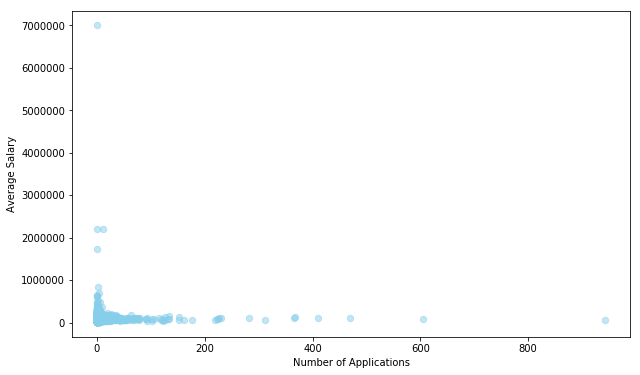

In [46]:
#scatterplot

colors = 'skyblue'
plt.figure(figsize=(10,6))
plt.scatter(ny3['count'], ny3['mean'], s=40, c=colors, alpha=0.5)
plt.xlabel("Number of Applications")
plt.ylabel('Average Salary')
plt.show()

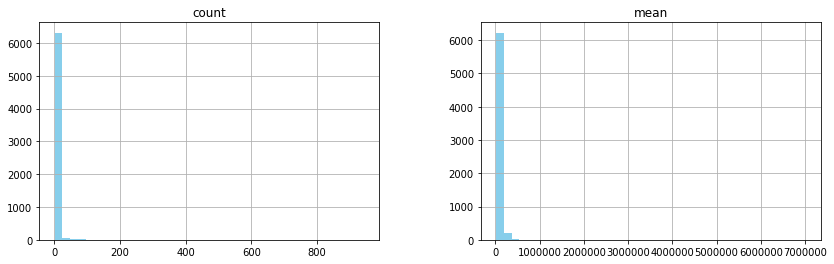

In [47]:
#skewed distribution

ny3.hist(bins=40, figsize=(14,4), color='skyblue');

In [48]:
#Spearmans Rho - is a good test of correlation for this skewed data 
#the test shows a low correlation, but they are still correlated
#we have a very low p-value so we can reject the null hypothesis that they are uncorrelated

spearmanr(ny3['count'], ny3['mean'])

SpearmanrResult(correlation=0.17459523009319919, pvalue=2.716899349372876e-45)

Fewer applications has higher variance in average salary, and slightly higher chance of making a very high salary. More inquiries is correlated with a lower salary, but still in an average salary range. Most companies have only one or two applications, so the data is very skewed. That explains why there's more variation with lower visa requests.

There is a weak but statistically significant relationship between the two variables as exhibited by a low Spearman's Rho and a very low p-value.

### What interesting questions might this dataset address? Brainstorm a handful of interesting questions, and scope them. Describe steps, methodology, and level of effort that would be required to answer each question. Additional, enriching, datasets are allowed, but not required.

#### I was told to spend 4 hours on this assignment but it's taken much much much longer than that, so not going to go into a ton of detail here. 

#### It could be interesting to see what types of work H1B workers typically do. We could analyzing soc codes vs job titles. It would be interesting and attractive to map the industries and frequency by zipcode in Tableau. And/or we could look at which occupations are the most popular and build a model to predict a given type of worker. This is what I'm going to do, but here are more ideas:
#### It could also be interesting to see what factors would most likely predict success with getting a H1B visa - this is what I'm most likely going to go with because it would be fairlyl simple to classify the status into 2 categories, "Certified" and "Not Certified". My understanding is that only" Certified" has the potential to lead to getting a H1B visa, and not all "Certified" statuses lead to a visa but it's the only road. Then we could run some classification algorithms to determine what factors correlate with a successful/unsuccessful outcome. We could run a logistic regression to determine salary based on correlating factors.
#### We could also look at things like length of application time, employment and location to determine their correlations to getting "Certified" etc - this could be achieved with a heatmap and would be useful in choosing correlated variables to include in a model.
#### I'm also interested in looking at what kind of workers get hired on a part-time or hourly basis as opposed to full-time. 
#### We could cluster the workers and see what similarities and differences we find... I usually find k-means to be useful in these scenarios. 


In [24]:
#looking at top 20 standard occupational classification codes

pd.DataFrame(df['soc_name'].value_counts().nlargest(20))

,soc_name
Computer Systems Analysts,92627
"Software Developers, Applications",77533
Computer Programmers,72043
"Computer Occupations, All Other",39422
"Software Developers, Systems Software",15681
Management Analysts,11598
Accountants and Auditors,9437
Financial Analysts,9272
Network and Computer Systems Administrators,8149
Mechanical Engineers,7373


In [25]:
#SocCode gives a better picture than just job titles because it's broader

pd.DataFrame(df['job_title'].value_counts().nlargest(20))

,job_title
PROGRAMMER ANALYST,43092
SOFTWARE ENGINEER,20359
COMPUTER PROGRAMMER,14878
SYSTEMS ANALYST,10200
BUSINESS ANALYST,7317
SOFTWARE DEVELOPER,7292
COMPUTER SYSTEMS ANALYST,6754
TECHNOLOGY LEAD - US,5038
TECHNOLOGY ANALYST - US,4885
SENIOR CONSULTANT,4873


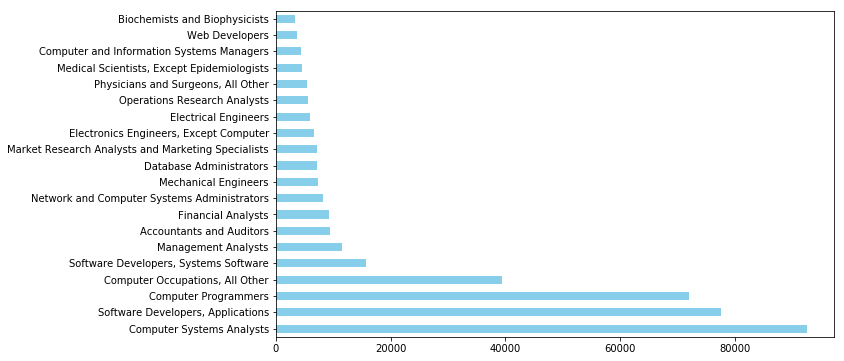

In [51]:
#tech workers dominate H1B applications

df['soc_name'].value_counts().nlargest(20).plot(kind="barh",color='skyblue', figsize=(10,6));

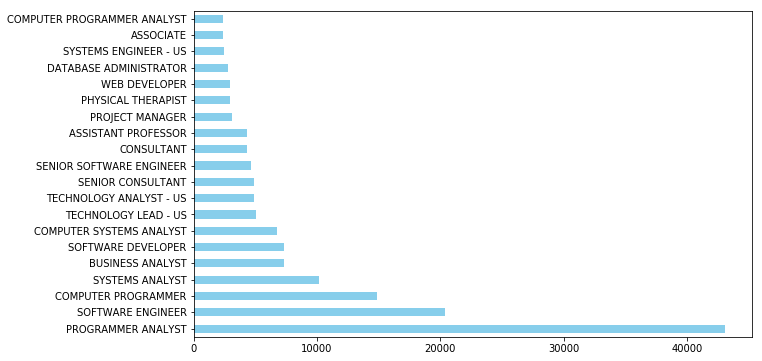

In [52]:
#looking at job titles, programmers, analysts and consultants are leading, with professors and
#physical therapists also in the running

df['job_title'].value_counts().nlargest(20).plot(kind="barh",color='skyblue', figsize=(10,6));

## Since computer workers dominate the top professions I'm going to make a model that determines if someone is a computer worker or not by SOC Category.

In [26]:
#preparing data for modeling, making a copy of the dataframe

df3 = df.copy()

In [27]:
#data preparation for modeling
#finding the length of employment and decision making time in days

df3['decision_date'] = pd.to_datetime(df3['decision_date'])
df3['submit_date'] = pd.to_datetime(df3['submit_date'])
df3['end_date'] = pd.to_datetime(df3['end_date'])
df3['start_date'] = pd.to_datetime(df3['start_date'])
df3['decision_time'] = (((df3['decision_date'] - df3['submit_date']).astype(int))/(86400000000000)).astype(int)
df3['employment_length'] = (((df3['end_date'] - df3['start_date']).astype(int))/(86400000000000)).astype(int)

In [28]:
min(df3['employment_length'])

-200

In [29]:
#getting rid of employees that haven't worked at least one day

df3 = df3[df3['employment_length'] > 0]

In [30]:
#creating a function to label the computer SOC Computer Occupations

def tech_func1(x):
    if "Computer Systems Analysts" in x:
        return 1
    elif "Computer and Information Research Scientists" in x:
        return 1
    elif "Computer and Information Research Analysts" in x:
        return 1
    elif "Information Security Analysts" in x:
        return 1
    elif "Software Developers and Programmers" in x:
        return 1
    elif "Software Developers, Applications" in x:
        return 1
    elif "Computer Programmers" in x:
        return 1
    elif 'Computer Occupations, All Other' in x:
        return 1
    elif 'Software Developers, Systems Software' in x:
        return 1
    elif "Software Developers, Applications" in x:
        return 1
    elif "Database and Systems Administrators and Network Architects" in x:
        return 1
    elif 'Network and Computer Systems Administrators' in x:
        return 1
    elif "Computer Network Architects" in x:
        return 1
    elif "Computer User Support Specialists" in x:
        return 1
    elif "Computer Support Specialists" in x:
        return 1
    elif "Computer Network Support Specialists" in x:
        return 1
    elif "Miscellaneous Computer Occupations" in x:
        return 1
    elif 'Database Administrators' in x:
        return 1
    elif 'Web Developers' in x:
        return 1
    else:
        return 0

df3['tech'] = df3['soc_name'].apply(tech_func1)

In [31]:
#wow, ~63% of HIB requests are for computer workers

print len(df3)
print len(df3[df3['tech'] == 1])

513065
321707


In [32]:
#looking at the number of postal codes and states for modeling
#I wouldn't include both postal codes and states in a model to avoid colinearity

print df3['employer_postal_code'].nunique()
print df3['employer_state'].nunique()

11363
55


In [33]:
#removing columns that have colinearity, not enough information, too much information, 
#or require too much time to pre-process and bin (e.g. datetime)

df3 = df3[['status', 'visa_class', 'employer_state','wage_rate_from', 'total_workers', 'decision_time', 'employment_length', 'tech']]

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513065 entries, 0 to 517434
Data columns (total 8 columns):
status               513065 non-null object
visa_class           513065 non-null object
employer_state       513065 non-null object
wage_rate_from       513065 non-null float64
total_workers        513065 non-null float64
decision_time        513065 non-null int64
employment_length    513065 non-null int64
tech                 513065 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 35.2+ MB


In [35]:
#label encoding variables

le = LabelEncoder()
df3['status'] = le.fit_transform(df3['status'])
df3['visa_class'] = le.fit_transform(df3['visa_class'])
df3['employer_state'] = le.fit_transform(df3['employer_state'])

In [36]:
#converting float to int

df3['wage_rate_from'] = df3.wage_rate_from.astype(int)
df3['total_workers'] = df3.total_workers.astype(int)

In [37]:
df3.head()

,status,visa_class,employer_state,wage_rate_from,total_workers,decision_time,employment_length,tech
0,1,1,46,50000,1,619,1095,0
1,0,1,16,65000,1,4,1096,0
2,2,1,24,50000,1,6,365,0
3,0,1,10,48000,1,5,1095,0
4,1,1,48,62000,1,7,1096,1


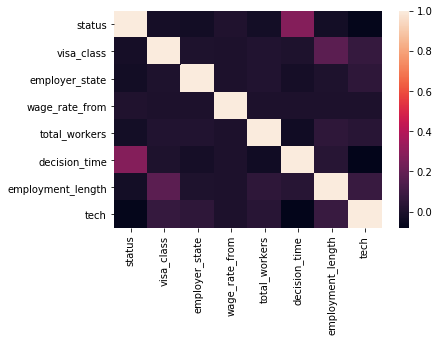

In [38]:
#let's look at correlated variables
#there are generally low correlations across the board. let's run it and see what happens!

import seaborn as sns
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [39]:
#making 2 dataframes, one with only tech workers in top categories and
#not tech workers in top categories

df3_tech = df3[df3['tech'] == 1]
df3_notech = df3[df3['tech'] == 0]

In [40]:
#creating 2 smaller samples so that this model may run locally and not take hours
#we're running ~40% of the data

df3_s1 = df3_tech.sample(100000)
df3_s2 = df3_notech.sample(100000)

In [73]:
#concatenate into one balanced sample
#keeping the sample smaller so that I may run locally

dfs = [df3_s1, df3_s2]
df3_s = pd.concat(dfs)

In [74]:
#splitting into data and target

y = df3_s['tech'].values
X = df3_s[['status', 'visa_class', 'wage_rate_from', 'employer_state', 'total_workers', 'decision_time', 'employment_length']]

In [75]:
#min max scaler

X = MinMaxScaler().fit_transform(X)

In [77]:
#choosing some Classifcation Algorithms that I like for this problem 
#and looking at their accuracy scores
#Logistic, Adaptive Boosting, Decision Tree, Support Vector Machine, Random Forest, 
#Extremely Randomized Trees, Ridge and K-Nearest Neighbors

models = [LogisticRegression(),
          AdaBoostClassifier(),
          DecisionTreeClassifier(),
          SVC(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          RidgeClassifier(tol=1e-2, solver="lsqr"),
          KNeighborsClassifier(n_neighbors=10)
         ]

res = []

for model in models:
    print model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print score
    res.append([model, score])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.5612272727272727
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
0.7003787878787879
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7456060606060606
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol

In [41]:
#preparing full dataframe to run on best algorithms

y1 = df3['tech'].values
X1 = df3[['status', 'visa_class', 'wage_rate_from', 'employer_state', 'total_workers', 'decision_time', 'employment_length']]

#min max scaler

X1 = MinMaxScaler().fit_transform(X1)

#test train split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X1_train, y1_train)
y1_pred = dt.predict(X1_test)
score = accuracy_score(y1_test, y1_pred)
print score

0.7450269325269325


In [43]:
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)
y1_pred = rf.predict(X1_test)
score = accuracy_score(y1_test, y1_pred)
print score

0.7560066622566622


In [44]:
#this is the best performing classifier - it's not great but it's ok

et = ExtraTreesClassifier()
et.fit(X1_train, y1_train)
y1_pred = et.predict(X1_test)
score = accuracy_score(y1_test, y1_pred)
print score

0.7707309582309583


In [46]:
#cross-validated accuracy score for Extra Trees - it's consistent

scores = cross_val_score(et, X1_test, y1_test, scoring='accuracy', cv=10)
print scores
print scores.mean()

# null accuracy - 
# a dumb model that always predicts 0 would be right ~63% of the time, so our model is better than that

print max(y1_test.mean(), 1 - y1_test.mean())

[0.75578786 0.76269785 0.75299746 0.75908098 0.7591991  0.75973067
 0.75772252 0.76469199 0.7616207  0.75317465]
0.758670376907994
0.6269018144018144


In [47]:
#find predicted values and class probabilities
#comparing evaluation metrics
#comparing accuracy scores (~77%) to
#sensitivity is 85% which is ok
#roc auc score .82

predicted = et.predict(X1_test)
probs = et.predict_proba(X1_test)

print accuracy_score(y1_test, predicted)
print recall_score(y1_test, predicted)
print roc_auc_score(y1_test, probs[:, 1])

0.7707309582309583
0.85451564884777
0.8242599073382082


In [48]:
#consistent scores of around 77% - it's consistently mediocre

print confusion_matrix(y1_test, predicted)
print classification_report(y1_test, predicted)

[[39794 23376]
 [15442 90700]]
             precision    recall  f1-score   support

          0       0.72      0.63      0.67     63170
          1       0.80      0.85      0.82    106142

avg / total       0.77      0.77      0.77    169312



In [49]:
#y_score array for ROC curve

y_score = et.predict_proba(X1_test)[:,1]

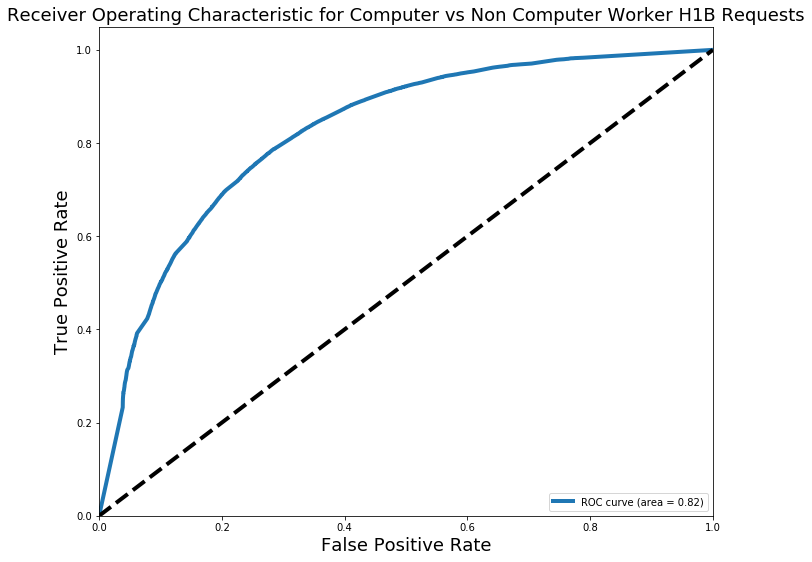

In [51]:
#ROC curve
#This model is mediocre, but not terrible 

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
#FPR[1], TPR[1], _ = roc_curve(y, y_score)
FPR[1], TPR[1], _ = roc_curve(y1_test, probs[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic for Computer vs Non Computer Worker H1B Requests', fontsize=18)
plt.legend(loc="lower right")
plt.show()

The results might be mediocre because there are other categories of workers that use computers that aren't classified under "Computer Occupations", or just that the data doesn't describe this problem well to begin with. Regardless, I chose this modeling exercise because I wanted to explore this problem because Computer Occupations obviously dominate H1B requests and I was wondering if that could be predicted and what features were most important in determining that.

In [89]:
#looking at feature importances

cols = ['status', 'visa_class', 'wage_rate_from', 'employer_state', 'total_workers', 'decision_time', 'employment_length']

features = pd.DataFrame(zip(cols, np.transpose(et.feature_importances_),
                 np.transpose(dt.feature_importances_), 
                 np.transpose(rf.feature_importances_) ), 
             columns = ['feature', 'et_importance', 'dt_importance', 'rf_importance'])
features = features.set_index('feature')
features

,et_importance,dt_importance,rf_importance
feature,,,
status,0.014777,0.020050,0.019419
visa_class,0.016623,0.026172,0.013210
wage_rate_from,0.530327,0.442709,0.472809
employer_state,0.179058,0.188904,0.202443
total_workers,0.031330,0.035923,0.039612
decision_time,0.090299,0.125039,0.109256
employment_length,0.137587,0.161202,0.143251


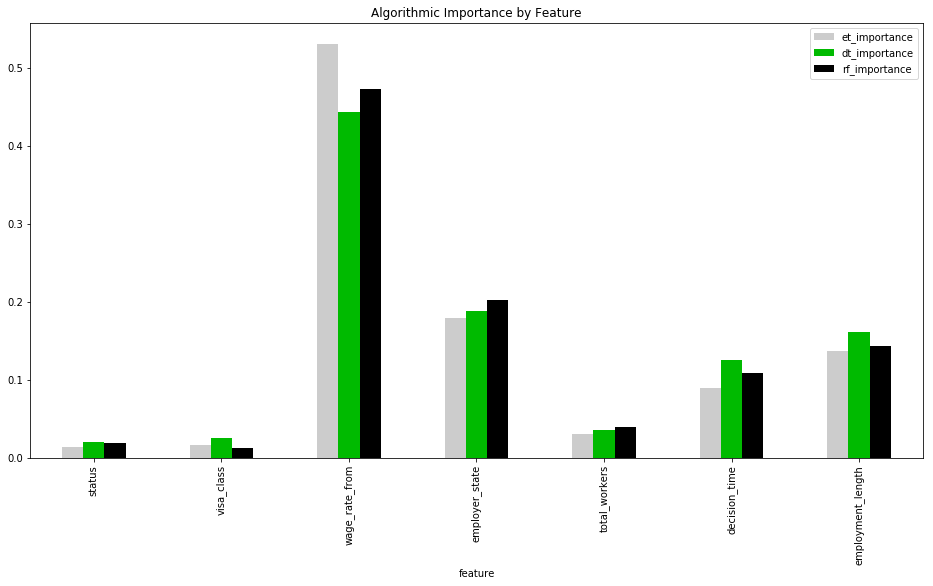

In [91]:
features.plot(kind='bar', colormap='nipy_spectral_r', title='Algorithmic Importance by Feature', figsize = (16,8));

Wage Rate, State and Employment Length are the most important features of being a computer worker. This would make sense as the Computer Salries seem to have lower variance, are located in states like New York and California and are probably employed longer.